<a href="https://colab.research.google.com/github/LaurelleJinelle/linear_regression_model/blob/main/Nformi_Jinelle_Linear_Regression_Model_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load The Dataset

In [13]:
import pandas as pd

df = pd.read_csv("./mydataset.csv")
df.head(100)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,895,CA,37.406914,-122.090370,94043,c:54066,Mountain View,Mountain View CA 94043,Blue Vector Systems,0,...,c:54066,0,0,0,1,0,0,3.0000,1,closed
96,251,IL,41.878984,-87.637000,60606,c:17219,Chicago,NaN,Open Kernel Labs,1,...,c:17219,1,0,1,0,0,0,2.0000,1,acquired
97,390,NJ,40.535316,-74.521435,8873,c:23234,Somerset,NaN,Elanti Systems,0,...,c:23234,1,0,0,0,0,0,3.0000,1,closed
98,1023,CA,37.779281,-122.419236,94105,c:70586,San Francisco,San Francisco CA 94105,Astrid,1,...,c:70586,0,1,0,0,0,0,3.0000,1,acquired


In [6]:
import os
os.listdir()

['decision_tree_pipeline.pkl',
 'mydataset.csv',
 'my_linear_regression.ipynb',
 'startup data.csv']

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

# Clean Up the data

This dataset currently contains allot of irrelevant columns, so we need to drop those columns

In [3]:
columns_to_drop = [
    'Unnamed: 0', 'Unnamed: 6', 'id', 'object_id', 'name', 'city',
    'zip_code', 'closed_at', 'is_CA', 'is_NY', 'is_TX', 'is_MA', 'is_top500', 'labels',
    'state_code.1', 'latitude', 'longitude', 'milestones', 'age_first_funding_year',
    'age_last_funding_year',  'avg_participants', 'is_otherstate',
    'age_first_milestone_year', 'age_last_milestone_year',
]
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state_code         923 non-null    object
 1   founded_at         923 non-null    object
 2   first_funding_at   923 non-null    object
 3   last_funding_at    923 non-null    object
 4   relationships      923 non-null    int64 
 5   funding_rounds     923 non-null    int64 
 6   funding_total_usd  923 non-null    int64 
 7   category_code      923 non-null    object
 8   is_software        923 non-null    int64 
 9   is_web             923 non-null    int64 
 10  is_mobile          923 non-null    int64 
 11  is_enterprise      923 non-null    int64 
 12  is_advertising     923 non-null    int64 
 13  is_gamesvideo      923 non-null    int64 
 14  is_ecommerce       923 non-null    int64 
 15  is_biotech         923 non-null    int64 
 16  is_consulting      923 non-null    int64 
 1

## Adjust Remaining Columns

Some of the remaining columns have datatypes other than integers, and in order to be able to work with them, we need to adjust convert them in the best way possible

#### Status
We need to convert our Status column to binary since it has just two possible values; acquired and closed, which also stand for Success or Failure
we can convert this to 0 and 1.

In [5]:
df['status'] = df['status'].map(lambda x: 1 if x in ['acquired', 'ipo'] else 0)

#### Industry Columns
In the existing dataset, there are multiple columns that are used to represent the industries the startups belong to.
Instead of having multiple colmuns, we can just hot encode them into one column

In [6]:
# Specify the columns that you want to encode
industry_columns = [
    'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
    'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'
]

# For each row, pick the one-hot industry if present, else fallback to category_code
def extract_industry(row):
    for col in industry_columns:
        if row[col] == 1:
            return col.replace('is_', '')
    return row['category_code']

df['industry_label'] = df.apply(extract_industry, axis=1)

# Convert industry labels to numeric codes
df['industry_code'] = df['industry_label'].astype('category').cat.codes

# Drop now-unneeded columns
df.drop(columns=industry_columns + ['category_code', 'industry_label'], inplace=True)


We also need to cenvert the values in the state_code column to numbers

In [7]:
df['state_code'] = df['state_code'].astype('category').cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state_code         923 non-null    int8  
 1   founded_at         923 non-null    object
 2   first_funding_at   923 non-null    object
 3   last_funding_at    923 non-null    object
 4   relationships      923 non-null    int64 
 5   funding_rounds     923 non-null    int64 
 6   funding_total_usd  923 non-null    int64 
 7   has_VC             923 non-null    int64 
 8   has_angel          923 non-null    int64 
 9   has_roundA         923 non-null    int64 
 10  has_roundB         923 non-null    int64 
 11  has_roundC         923 non-null    int64 
 12  has_roundD         923 non-null    int64 
 13  status             923 non-null    int64 
 14  industry_code      923 non-null    int8  
dtypes: int64(10), int8(2), object(3)
memory usage: 95.7+ KB


In [9]:
df.head(5)

,state_code,founded_at,first_funding_at,last_funding_at,relationships,funding_rounds,funding_total_usd,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status,industry_code
0,2,1/1/2007,4/1/2009,1/1/2010,3,3,375000,0,1,0,0,0,0,1,7
1,2,1/1/2000,2/14/2005,12/28/2009,9,4,40100000,1,0,0,1,1,1,1,4
2,2,3/18/2009,3/30/2010,3/30/2010,5,1,2600000,0,0,1,0,0,0,1,9
3,2,1/1/2002,2/17/2005,4/25/2007,5,3,40000000,0,0,0,1,1,1,1,8
4,2,8/1/2010,8/1/2010,4/1/2012,2,2,1300000,1,1,0,0,0,0,0,5


#### Date
The columns that contain dates also need to be adjusted a little bit
The days and months don't really matter, all we need is the year

In [10]:
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=False).dt.year

In [11]:
df.head(10)

,state_code,founded_at,first_funding_at,last_funding_at,relationships,funding_rounds,funding_total_usd,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status,industry_code
0,2,2007,2009,2010,3,3,375000,0,1,0,0,0,0,1,7
1,2,2000,2005,2009,9,4,40100000,1,0,0,1,1,1,1,4
2,2,2009,2010,2010,5,1,2600000,0,0,1,0,0,0,1,9
3,2,2002,2005,2007,5,3,40000000,0,0,0,1,1,1,1,8
4,2,2010,2010,2012,2,2,1300000,1,1,0,0,0,0,0,5
5,2,2002,2006,2006,3,1,7500000,0,0,0,1,0,0,0,7
6,2,2005,2006,2010,6,3,26000000,1,0,1,1,0,0,1,8
7,2,2004,2005,2010,25,3,34100000,0,0,1,1,0,1,1,7
8,12,2002,2005,2013,13,3,9650000,1,0,1,0,0,1,1,6
9,2,2005,2007,2010,14,3,5750000,1,1,1,0,0,0,1,9


#### This is to confirm that we don't have any missing values in our dataset

In [12]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# Visualization

Now that our dataset is all cleaned up, it is advisable to visualize it and to be able to understand the relationships between different columns better

### Correlation Heatmap
This helps us see the correlation between all the columns in the dataset

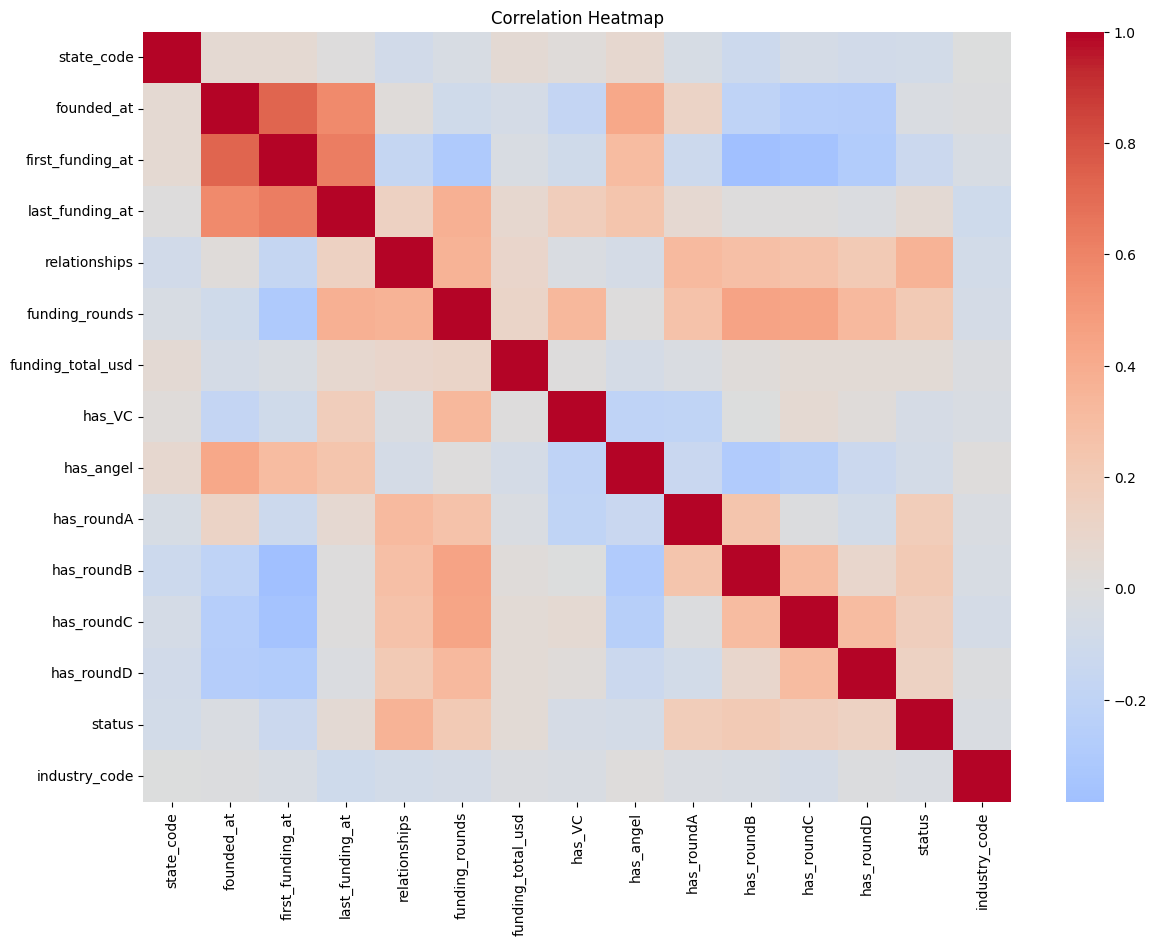

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

### Correlation with Target Column
Since Status is our target column, it would be wise to see how well the other columns correlate to it

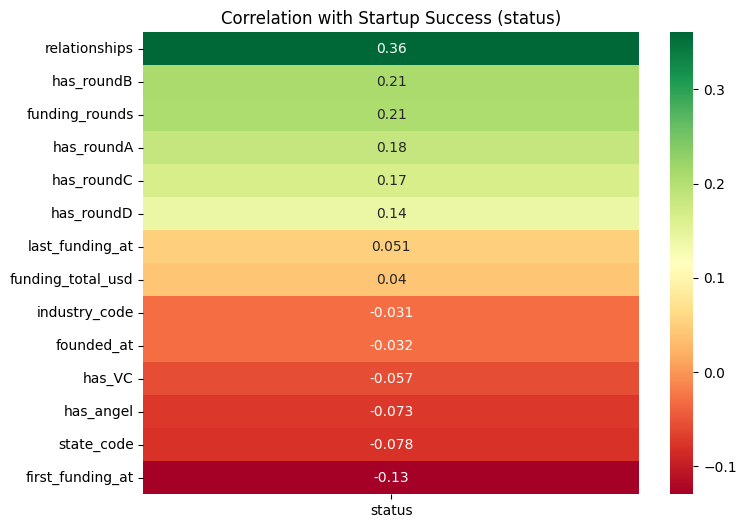

In [14]:
correlation_with_status = df.corr()['status'].drop('status').sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_status.to_frame(), annot=True, cmap="RdYlGn")
plt.title("Correlation with Startup Success (status)")
plt.show()


### More Visuals
These remaining bar plots just show the relationships between the Status column and multpile other columns.

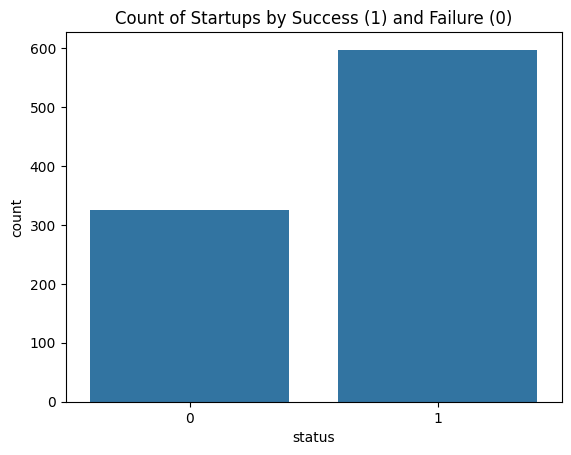

In [15]:
sns.countplot(x='status', data=df)
plt.title('Count of Startups by Success (1) and Failure (0)')
plt.show()

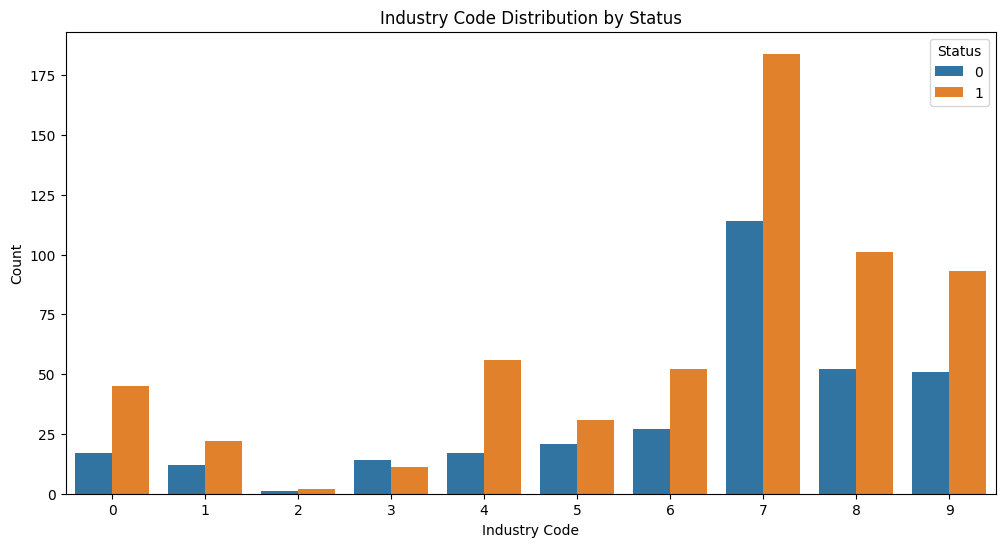

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='industry_code', hue='status', data=df, palette='tab10')
plt.title('Industry Code Distribution by Status')
plt.xlabel('Industry Code')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

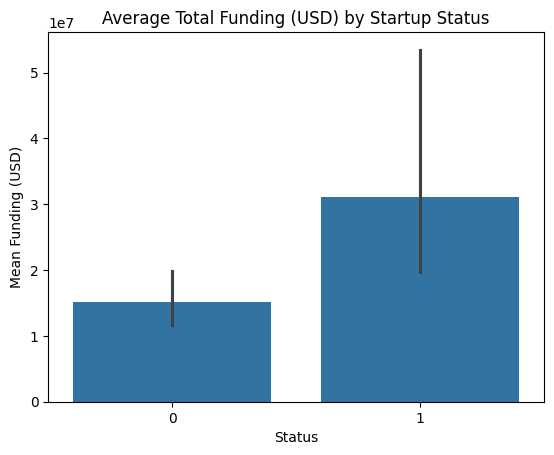

In [17]:
sns.barplot(x='status', y='funding_total_usd', data=df)
plt.title('Average Total Funding (USD) by Startup Status')
plt.ylabel('Mean Funding (USD)')
plt.xlabel('Status')
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   state_code         923 non-null    int8 
 1   founded_at         923 non-null    int32
 2   first_funding_at   923 non-null    int32
 3   last_funding_at    923 non-null    int32
 4   relationships      923 non-null    int64
 5   funding_rounds     923 non-null    int64
 6   funding_total_usd  923 non-null    int64
 7   has_VC             923 non-null    int64
 8   has_angel          923 non-null    int64
 9   has_roundA         923 non-null    int64
 10  has_roundB         923 non-null    int64
 11  has_roundC         923 non-null    int64
 12  has_roundD         923 non-null    int64
 13  status             923 non-null    int64
 14  industry_code      923 non-null    int8 
dtypes: int32(3), int64(10), int8(2)
memory usage: 84.9 KB


#Model Training

###Define Features and target

In [19]:
X = df[['relationships', 'has_roundB', 'funding_rounds', 'has_roundA', 'has_roundC', 'has_roundD', 'funding_total_usd']]
y = df['status']

###Split int Test and Train data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Standardize data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training

###Multpile Models
The data is going to be passed through three different models; Linear regression, Decision Tree and Random Forest

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train RMSE': round(train_rmse, 6),
        'Test RMSE': round(test_rmse, 6),
        'R² Score': round(r2, 6)
    })

# Display results as a table
results_df = pd.DataFrame(results)
print(results_df)

               Model  Train RMSE  Test RMSE  R² Score
0  Linear Regression    0.438917   0.445608  0.168793
1      Decision Tree    0.368026   0.424828  0.244511
2      Random Forest    0.176822   0.470744  0.072376


At the end of the training, we can see that Decision Tree is the most suitable model with the highest R^2 score and lowest RMSE test score



###Scatter plot of models

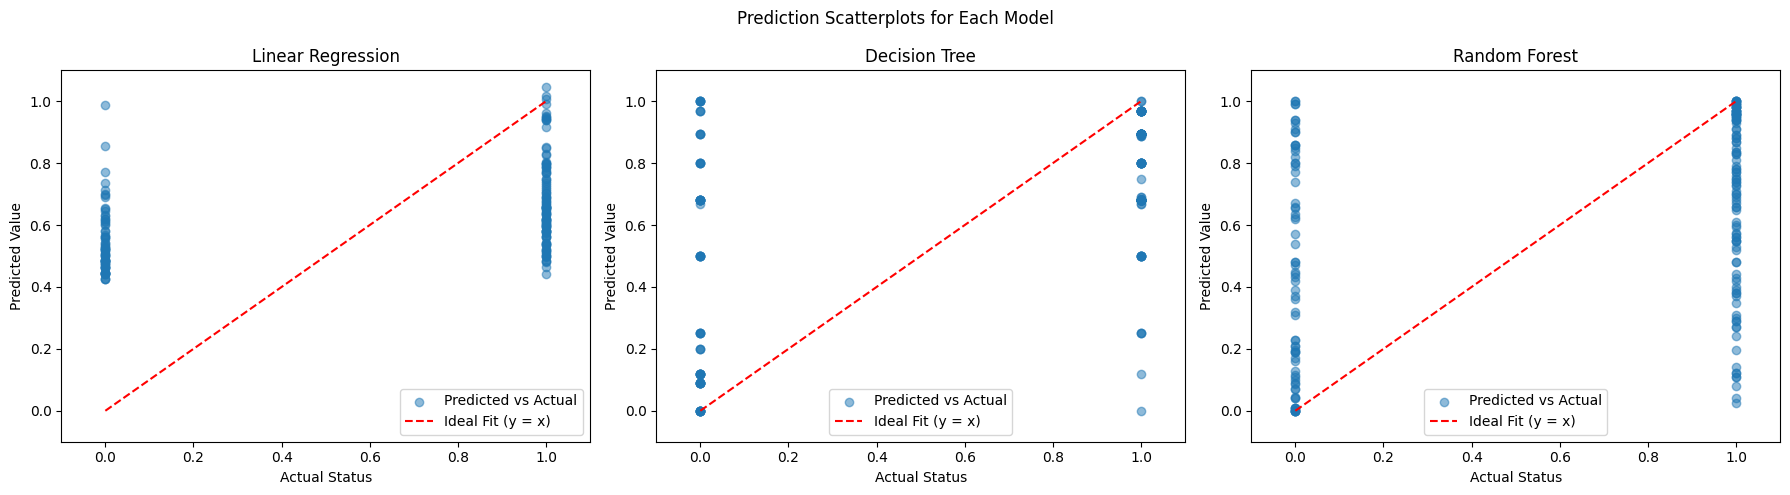

In [23]:
plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([0, 1], [0, 1], 'r--', label='Ideal Fit (y = x)')  # reference line
    plt.xlabel('Actual Status')
    plt.ylabel('Predicted Value')
    plt.title(f'{name}')
    plt.legend()
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)

plt.suptitle('Prediction Scatterplots for Each Model')
plt.tight_layout()
plt.show()

###Loss Curve for each model

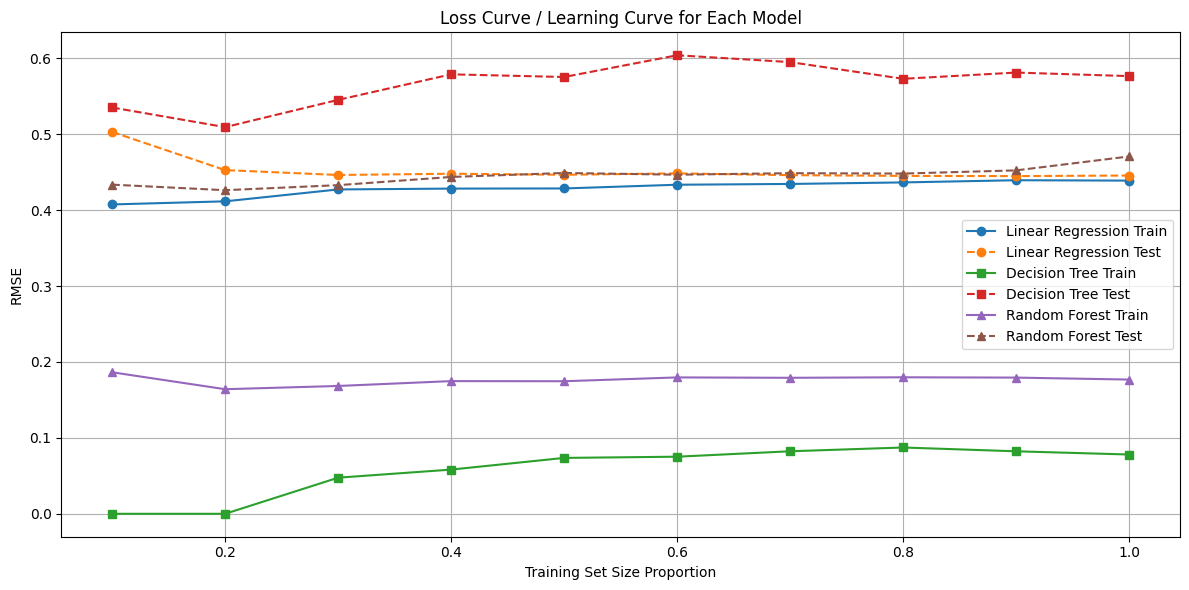

In [24]:
# Models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Store train/test errors at different data sizes
train_sizes = np.linspace(0.1, 1.0, 10)
lr_train_errors, lr_test_errors = [], []
dt_train_errors, dt_test_errors = [], []
rf_train_errors, rf_test_errors = [], []

for size in train_sizes:
    # Sample training data
    split_idx = int(size * len(X_train_scaled))
    X_sub = X_train_scaled[:split_idx]
    y_sub = y_train[:split_idx]

    # Linear Regression
    lr.fit(X_sub, y_sub)
    y_train_pred = lr.predict(X_sub)
    y_test_pred = lr.predict(X_test_scaled)
    lr_train_errors.append(np.sqrt(mean_squared_error(y_sub, y_train_pred)))
    lr_test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Decision Tree
    dt.fit(X_sub, y_sub)
    y_train_pred = dt.predict(X_sub)
    y_test_pred = dt.predict(X_test_scaled)
    dt_train_errors.append(np.sqrt(mean_squared_error(y_sub, y_train_pred)))
    dt_test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Random Forest
    rf.fit(X_sub, y_sub)
    y_train_pred = rf.predict(X_sub)
    y_test_pred = rf.predict(X_test_scaled)
    rf_train_errors.append(np.sqrt(mean_squared_error(y_sub, y_train_pred)))
    rf_test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


plt.figure(figsize=(12, 6))

plt.plot(train_sizes, lr_train_errors, 'o-', label='Linear Regression Train')
plt.plot(train_sizes, lr_test_errors, 'o--', label='Linear Regression Test')

plt.plot(train_sizes, dt_train_errors, 's-', label='Decision Tree Train')
plt.plot(train_sizes, dt_test_errors, 's--', label='Decision Tree Test')

plt.plot(train_sizes, rf_train_errors, '^-', label='Random Forest Train')
plt.plot(train_sizes, rf_test_errors, '^--', label='Random Forest Test')

plt.xlabel('Training Set Size Proportion')
plt.ylabel('RMSE')
plt.title('Loss Curve / Learning Curve for Each Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Packaging The Model
Since the model needs to be deployed, it needs to be properly packaged and saved

In [25]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeRegressor(random_state=42, max_depth=5))
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = pipeline.predict(X_test)

print("Pipeline Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Pipeline R² Score:", r2_score(y_test, y_test_pred))

joblib.dump(pipeline, "decision_tree_pipeline.pkl")

Pipeline Test RMSE: 0.42482776211962997
Pipeline R² Score: 0.24451063783296434


['decision_tree_pipeline.pkl']

In [27]:
from google.colab import files
files.download("decision_tree_pipeline.pkl")

ModuleNotFoundError: No module named 'google'

Model has now been trained, packaged and saved!